In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [6]:
gnb = GaussianNB()

In [7]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
gnb.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
score = accuracy_score(y_pred,y_test)

In [21]:
score

1.0

In [22]:
conf = confusion_matrix(y_pred,y_test)

In [23]:
print(conf)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


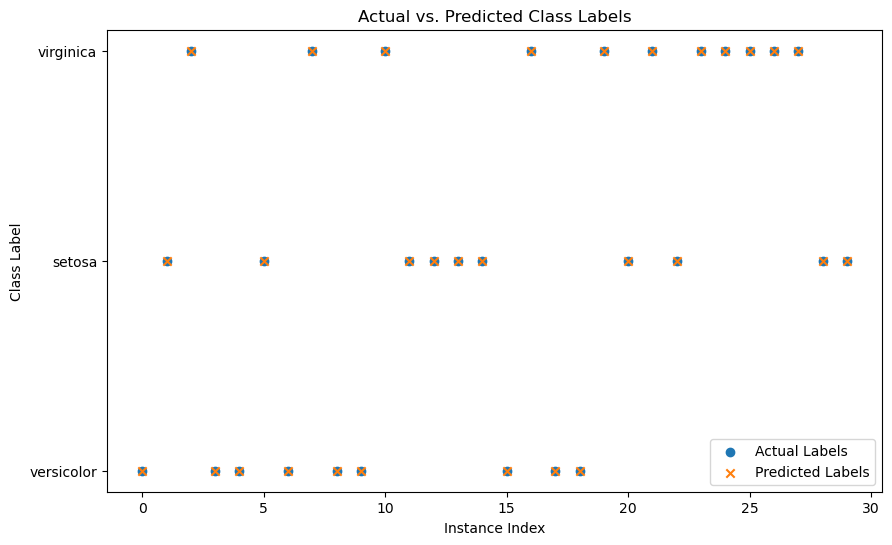

In [29]:

# Plot actual vs. predicted labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Labels', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Labels', marker='x')
plt.xlabel('Instance Index')
plt.ylabel('Class Label')
plt.title('Actual vs. Predicted Class Labels')
plt.legend()
plt.show()


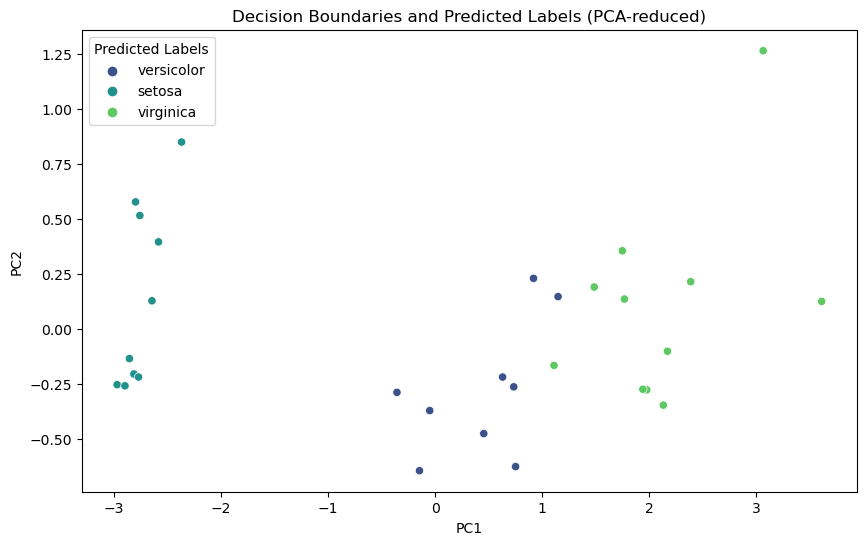

In [30]:
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

# Plot decision boundaries along with actual data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_pred, palette='viridis', legend='full')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundaries and Predicted Labels (PCA-reduced)')
plt.legend(title='Predicted Labels')
plt.show()
